In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import math
import seaborn as sb
from sklearn import preprocessing

Total_cases_CA_origin_Alameda_graph is the same as Total_cases_CA_origin_Alameda, but with Contra Costa removed due to a computation error.

Simulation Results is manually made from Model 19 simulation results.


## Comparing Total Infection: Model vs Real Data

<div class="alert alert-block alert-success">
Creating Figure 7

In [3]:
total = pd.read_excel('Model 19 - Total_cases_CA_origin_Alameda_graph.xls')
total.head(2)

,Unnamed: 0,Total population,Total Commuters,Non-infected,Infected (Work),Infected (Quarantine) / Recovered,Total Check,Total Infected
0,0,17172689,17172683,17172081,602,6,17172689,608
1,1,17172689,17172322,17167653,4669,367,17172689,5036


In [4]:
total_CA = pd.read_excel('covid_cumulative.xlsx')
total_CA_half = total_CA.iloc[0:50]


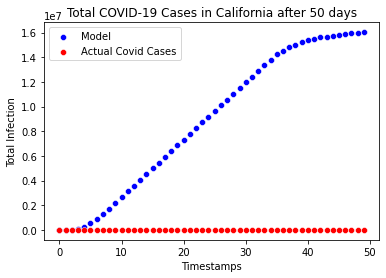

In [5]:

overview = sb.scatterplot(data = total,
             x = list(total.index),
               y = "Total Infected", lw = 3,color = 'blue')

overview = sb.scatterplot(data = total_CA_half,
             x = list(total.index),
               y = "Cases", lw = 3, color = 'red')


plt.xlabel("Timestamps")
plt.ylabel("Total Infection")
overview.set(title = "Total COVID-19 Cases in California after 50 days")
plt.legend(labels=["Model","Actual Covid Cases"])


## Eigencentrality Compare
(Not included in the paper)

In [6]:
EV_data = {'Alameda County': 0.00029163334328798015, 
 'El Dorado County': 3.253241174409117e-05, 'Fresno County': 0.00013312909405440202, 
 'Humboldt County': 4.33910467479168e-05, 'Kern County': 0.0019524716807333981, 
 'Lake County': 2.7493019837103954e-05, 'Los Angeles County': 0.9977599687972114, 
 'Marin County': 3.954605715843731e-05, 'Mendocino County': 1.0859041046835566e-05, 
 'Merced County': 4.2556010385738395e-05, 'Monterey County': 0.0001262010993998445, 
 'Napa County': 1.4066942968877335e-05, 'Nevada County': 1.6365082295874413e-05, 
 'Orange County': 0.06411952565661373, 'Placer County': 4.16337820556807e-05, 
 'Riverside County': 0.00455414678018167, 'Sacramento County': 0.00018633712786665687, 
 'San Benito County': 8.97026927644296e-06, 'San Bernardino County': 0.015561100328349158, 
 'San Diego County': 0.0024406059708382243, 'San Francisco County': 0.0003915567217190359, 
 'San Joaquin County': 4.5775181946655965e-05, 'San Luis Obispo County': 5.7207413343249076e-05, 
 'San Mateo County': 0.00019074026869194107, 'Santa Barbara County': 0.0005646953486247942, 
 'Santa Clara County': 0.0004435751289318767, 'Santa Cruz County': 3.276209029314852e-05, 
 'Shasta County': 4.004481290901418e-06, 'Solano County': 1.746103976061137e-05, 
 'Sonoma County': 6.873107320974113e-05, 'Stanislaus County': 4.729788561153936e-05, 
 'Sutter County': 2.44921306816305e-07, 'Tehama County': 2.4737684714786473e-06, 
 'Tuolumne County': 4.353146280499372e-06, 'Ventura County': 0.009495802110766212, 
 'Yolo County': 3.3301261525480734e-05, 'Yuba County': 4.8820228296903595e-06, 
 'Alpine County': 2.719721114407979e-07, 'Amador County': 2.740157354407084e-06, 
 'Butte County': 1.5512571299454484e-05, 'Calaveras County': 8.264669208834885e-06, 
 'Tulare County': 7.652589783956847e-05, 'Colusa County': 3.2137668195407654e-06, 
 'Glenn County': 7.20373815324321e-08, 'Imperial County': 5.467072735801512e-05, 
 'Kings County': 2.222649709234556e-05, 'Lassen County': 2.3314846886927704e-08, 
 'Modoc County': 1.5049039362327743e-09, 'Plumas County': 7.924279893305507e-06, 
 'Siskiyou County': 1.9433598866794084e-06, 'Trinity County': 1.1737220933156295e-07, 
 'Madera County': 1.799018961974461e-05, 'Mariposa County': 3.878141632742585e-06, 
 'Mono County': 2.1502301983456238e-05, 'Del Norte County': 1.3730657161859155e-07, 
 'Inyo County': 2.4408860055501546e-05, 'Sierra County': 9.666965858226397e-07}

In [10]:
df_EV = pd.DataFrame(
    [{"County": County, "count": value} for (County), value in EV_data.items()])


In [12]:
total_sim = pd.read_excel('Model 19 - Simulation Results.xlsx')
total_sim.head(1)

,County,Cases
0,Alameda County,16021482


<AxesSubplot:xlabel='count', ylabel='Cases'>

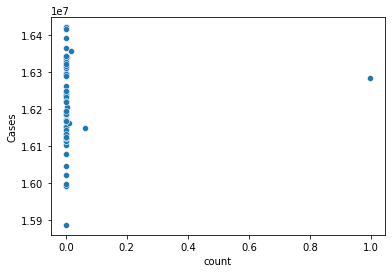

In [16]:
horizontal_concat = pd.concat([df_EV[["count"]], total_sim[["Cases"]]], axis=1)

sb.scatterplot(data = horizontal_concat, x="count", y="Cases")

## PageRank centrality Compare

<div class="alert alert-block alert-success">
Creating Figure 9


Text(0, 0.5, 'Total COVID-19 cases')

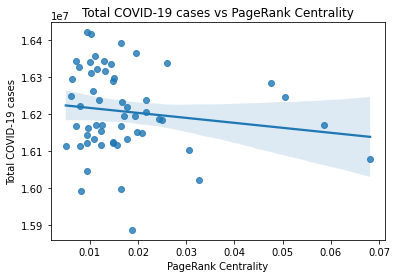

In [19]:
PR_data = {'Alameda County': 0.03264036723605933, 'El Dorado County': 0.010704172387633085, 'Fresno County': 0.030565037383362616, 'Humboldt County': 0.021603789759986326, 'Kern County': 0.019609278490869332, 'Lake County': 0.008090804219284004, 'Los Angeles County': 0.04761324951481759, 'Marin County': 0.01236376091069594, 'Mendocino County': 0.015088780823087336, 'Merced County': 0.010194262633839114, 'Monterey County': 0.017069998844419433, 'Napa County': 0.01285730989721099, 'Nevada County': 0.012315743263451358, 'Orange County': 0.02079276669220669, 'Placer County': 0.019730402110263893, 'Riverside County': 0.010108131664103662, 'Sacramento County': 0.05851131890490186, 'San Benito County': 0.00503615045379986, 'San Bernardino County': 0.011045730579955358, 'San Diego County': 0.02161152401648525, 'San Francisco County': 0.05054462512952155, 'San Joaquin County': 0.017697957509930695, 'San Luis Obispo County': 0.014464506841955644, 'San Mateo County': 0.026037640637419916, 'Santa Barbara County': 0.01869902004496534, 'Santa Clara County': 0.06814159981626151, 'Santa Cruz County': 0.011954079185662136, 'Shasta County': 0.02506994384315172, 'Solano County': 0.011296839209453288, 'Sonoma County': 0.016640117128401768, 'Stanislaus County': 0.01566688895574646, 'Sutter County': 0.009399644907365891, 'Tehama County': 0.009333472334566668, 'Tuolumne County': 0.012624105647153576, 'Ventura County': 0.0095938419605344, 'Yolo County': 0.016476804199937543, 'Yuba County': 0.008048862119007226, 'Alpine County': 0.006020085154278915, 'Amador County': 0.007672742633323374, 'Butte County': 0.02441180594336775, 'Calaveras County': 0.006250829226803081, 'Tulare County': 0.014728003024328576, 'Colusa County': 0.009444222186327018, 'Glenn County': 0.007896325672331886, 'Imperial County': 0.013250465564150904, 'Kings County': 0.010365358963169148, 'Lassen County': 0.017629080359035335, 'Modoc County': 0.010856400007098933, 'Plumas County': 0.014892520482749002, 'Siskiyou County': 0.019418396130150697, 'Trinity County': 0.011538480289238658, 'Madera County': 0.009366983892177584, 'Mariposa County': 0.007138047327620283, 'Mono County': 0.016549091236674238, 'Del Norte County': 0.016418556424815097, 'Inyo County': 0.014923409500536073, 'Sierra County': 0.0071871033150087}

df_PR = pd.DataFrame(
    [{"County": County, "count": value} for (County), value in PR_data.items()])
df_PR

total_sim = pd.read_excel('Model 19 - Simulation Results.xlsx')
total_sim

horizontal_concat2 = pd.concat([df_PR[["count"]], total_sim[["Cases"]]], axis=1)

plot = sb.regplot(data = horizontal_concat2, x="count", y="Cases").set(title = "Total COVID-19 cases vs PageRank Centrality")
plt.xlabel("PageRank Centrality")
plt.ylabel("Total COVID-19 cases")
